# McNemar's Test to Compare Classifiers

Suppose we have two classifiers $f$ and $g$ for a binary classification problem. We are interested in comparing if their classification differences are statistically significant, i.e. if one is better than the other. Our null hypothesis is that the classifiers have a similar proportion of errors on the test set.

To evalueate this null hypothesis, the test relies on a $2\times 2$ **contingency table**. Such a contingency table is a count of binary categorical variables and displays the number of $n$ total samples assigned to each variable.

| Contingency Table | $g(x) = 0$   | $g(x) = 1$   | Row Total    |
|-------------------|--------------|--------------|--------------|
| $f(x) = 0$        | $n_{00}$     | $n_{01}$     | $n_{0\cdot}$ |
| $f(x) = 0$        | $n_{10}$     | $n_{11}$     | $n_{1\cdot}$ |
| Column Total      | $n_{\cdot0}$ | $n_{\cdot1}$ | $n$          |

Let $p_{ij}$ denote the probability of some sample occurring in cell $ij$. Then the null and alternative hypotheses of the test are
$$H_0: p_{01} = p_{10}$$
$$H_1: p_{01} \neq p_{10}$$
We only care about the likelihood that $f$ and $g$ disagree. Then **McNemar's test statistic** is
$$\mathcal{X}^2 = \frac{(p_{01} - p_{10})^2}{p_{01} + p_{10}}$$
where $\mathcal{X}^2$ has a chi-squared distribution with 1 degree of freedom. This yields a p-value for us to either accept or reject the null upon.

McNemar's Test is useful as it allows one to compare the distribution of disagreement between the two classifier in a non-parametric way and without requiring any resampling procedures. Additionally, it identifies differences even when single classifier sensitivity and specificity are high.

## An Application
Let's apply it to an example, comparing two sklearn classifiers. We will naively compare a Random Forest to Logistic Regression.

In [139]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [155]:
X, y = make_moons(n_samples=1000, noise=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clfLR = LogisticRegression(random_state=42)
clfLR.fit(X_train, y_train)
print("Logistic Regression accuracy on test data: {:.2f}".format(clfLR.score(X_test, y_test)))

clfRF = RandomForestClassifier(n_estimators=100, random_state=42)
clfRF.fit(X_train, y_train)
print("Random Forest accuracy on test data: {:.2f}".format(clfRF.score(X_test, y_test)))

Logistic Regression accuracy on test data: 0.83
Random Forest accuracy on test data: 0.81


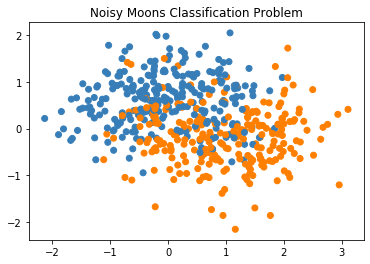

In [156]:
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(X_train[:,0], X_train[:,1], color=colors[y_train])
plt.title('Noisy Moons Classification Problem')
plt.show()

The models have been trained and the test data is as appears in the plot above. The 2x2 Contingency Table appears as follows.

In [157]:
n_table = pd.crosstab(clfLR.predict(X_test), clfRF.predict(X_test), rownames=['Logistic Regression'], colnames=['Random Forest'], margins=True)
display(n_table)

Random Forest,0,1,All
Logistic Regression,,,
0,226,16,242
1,40,218,258
All,266,234,500


Now we compute the test statistic and corresponding p-value

In [158]:
p01 = n_table.iloc[0][1]
p10 = n_table.iloc[1][0]
test_statistic = (p01 - p10)**2 / (p01 + p10)
p_value = 1 - stats.chi2.cdf(test_statistic, 1)
print(f'Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

Test Statistic: 10.285714285714286
p-value: 0.0013406411172295352


With an $\alpha$-level of 0.05, the p-value is statistically significang in this case and so we reject the null hypothesis that the classifiers have equal marginal probabilities.